In [1]:
#importing the needed Libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [2]:
#Importing the Datasets
world_population = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_1637443.csv", skiprows=3)
urban_population = pd.read_csv("API_SP.URB.TOTL_DS2_en_csv_v2_1868968.csv", skiprows=3)

In [3]:
#Importing the world dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [4]:
world_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN,NaN


In [5]:
urban_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Urban population,SP.URB.TOTL,27526.0,28141.0,28532.0,28761.0,28924.0,29082.0,...,44057.0,44348.0,44665.0,44979.0,45296.0,45616.0,45948.0,46295.0,NaN,NaN
1,Afghanistan,AFG,Urban population,SP.URB.TOTL,755836.0,796272.0,839385.0,885228.0,934135.0,986074.0,...,7528588.0,7865067.0,8204877.0,8535606.0,8852859.0,9164841.0,9477100.0,9797273.0,NaN,NaN
2,Angola,AGO,Urban population,SP.URB.TOTL,569222.0,597288.0,628381.0,660180.0,691532.0,721552.0,...,15383127.0,16130304.0,16900847.0,17691524.0,18502165.0,19332881.0,20184707.0,21061025.0,NaN,NaN
3,Albania,ALB,Urban population,SP.URB.TOTL,493982.0,513592.0,530766.0,547928.0,565248.0,582374.0,...,1575788.0,1603505.0,1630119.0,1654503.0,1680247.0,1706345.0,1728969.0,1747593.0,NaN,NaN
4,Andorra,AND,Urban population,SP.URB.TOTL,7839.0,8766.0,9754.0,10811.0,11915.0,13067.0,...,73056.0,71515.0,70057.0,68919.0,68213.0,67876.0,67813.0,67873.0,NaN,NaN


In [6]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [7]:
#Cleaning the datasets by removing the last two columns on the urban & world population dataframes
world_population.drop(['2020','Unnamed: 65'], axis=1, inplace=True)
urban_population.drop(['2020','Unnamed: 65'], axis=1, inplace=True)

In [8]:
#Renaming the country name column in the world dataset
world = world.rename(columns = {'name': 'Country Name', 'iso_a3': 'Country Code'}, inplace = False)
world.head()

,pop_est,continent,Country Name,Country Code,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [9]:
#Selecting Columns needed to create a join from the urban and world population dataset
world_population_df = world_population[["Country Name","Country Code", "1990","2000","2010"]]
urban_population_df = urban_population[["Country Name", "Country Code", "1990", "2000", "2010"]]

In [10]:
#Creating a join
population_merged = urban_population_df.merge(world_population_df, on="Country Code", how="inner")
population_merged.head()

,Country Name_x,Country Code,1990_x,2000_x,2010_x,Country Name_y,1990_y,2000_y,2010_y
0,Aruba,ABW,31273.0,42444.0,43778.0,Aruba,62149.0,90853.0,101669.0
1,Afghanistan,AFG,2628554.0,4587798.0,6927764.0,Afghanistan,12412308.0,20779953.0,29185507.0
2,Angola,AGO,4400964.0,8212001.0,13963065.0,Angola,11848386.0,16395473.0,23356246.0
3,Albania,ALB,1197222.0,1289391.0,1519519.0,Albania,3286542.0,3089027.0,2913021.0
4,Andorra,AND,51627.0,60417.0,75007.0,Andorra,54509.0,65390.0,84449.0


In [11]:
#Calculating the world urban population per capita
population_merged['1990_z'] = population_merged['1990_x'] / population_merged['1990_y']
population_merged['2000_z'] = population_merged['2000_x'] / population_merged['2000_y']
population_merged['2010_z'] = population_merged['2010_x'] / population_merged['2010_y']

population_merged.head()

,Country Name_x,Country Code,1990_x,2000_x,2010_x,Country Name_y,1990_y,2000_y,2010_y,1990_z,2000_z,2010_z
0,Aruba,ABW,31273.0,42444.0,43778.0,Aruba,62149.0,90853.0,101669.0,0.503194,0.467172,0.430593
1,Afghanistan,AFG,2628554.0,4587798.0,6927764.0,Afghanistan,12412308.0,20779953.0,29185507.0,0.211770,0.220780,0.237370
2,Angola,AGO,4400964.0,8212001.0,13963065.0,Angola,11848386.0,16395473.0,23356246.0,0.371440,0.500870,0.597830
3,Albania,ALB,1197222.0,1289391.0,1519519.0,Albania,3286542.0,3089027.0,2913021.0,0.364280,0.417410,0.521630
4,Andorra,AND,51627.0,60417.0,75007.0,Andorra,54509.0,65390.0,84449.0,0.947128,0.923949,0.888193


In [12]:
#Adding Geometry to the Dataframe
population_gdf = world.merge(population_merged, on="Country Code", how="inner")
population_gdf.head()

,pop_est,continent,Country Name,Country Code,gdp_md_est,geometry,Country Name_x,1990_x,2000_x,2010_x,Country Name_y,1990_y,2000_y,2010_y,1990_z,2000_z,2010_z
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,303167.0,388537.0,448576.0,Fiji,728573.0,811006.0,859818.0,0.416111,0.47908,0.52171
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,4759494.0,7473332.0,12467582.0,Tanzania,25203845.0,33499180.0,44346525.0,0.188840,0.22309,0.28114
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,21206427.0,24388404.0,27522537.0,Canada,27691138.0,30685730.0,34004889.0,0.765820,0.79478,0.80937
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,187966119.0,223069137.0,249845296.0,United States,249623000.0,282162411.0,309321666.0,0.753000,0.79057,0.80772
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,9198366.0,8349417.0,9275230.0,Kazakhstan,16348000.0,14883626.0,16321872.0,0.562660,0.56098,0.56827


<AxesSubplot:title={'center':'1990 Urban Population Per Capita'}>

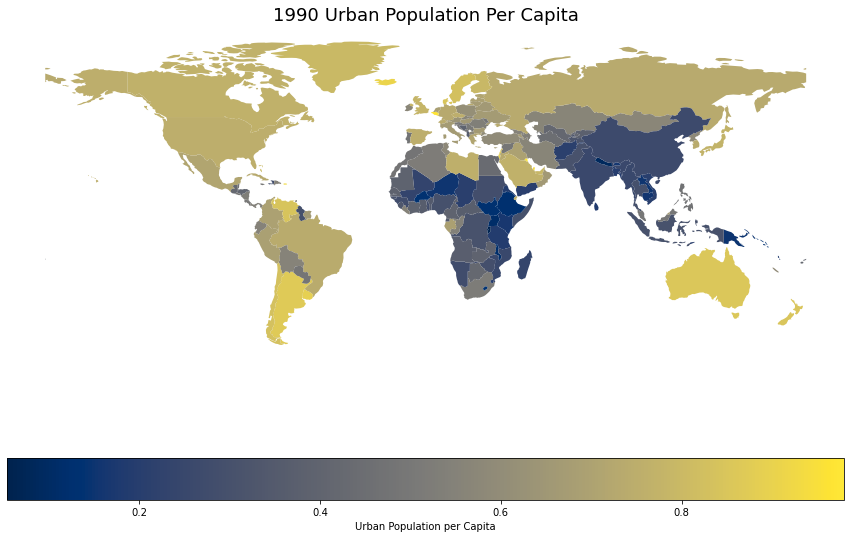

In [13]:
#Plotting the world population per capita for 1990
fig, ax = plt.subplots(figsize=(15,12))
ax.set_title('1990 Urban Population Per Capita', fontdict={'fontsize': 18})
ax.set_axis_off()
population_gdf.plot(column='1990_z',
           ax=ax,
           cmap = 'cividis',
           legend = True,
           legend_kwds={'label': "Urban Population per Capita", 'orientation': "horizontal"})

<AxesSubplot:title={'center':'2000 Urban Population Per Capita'}>

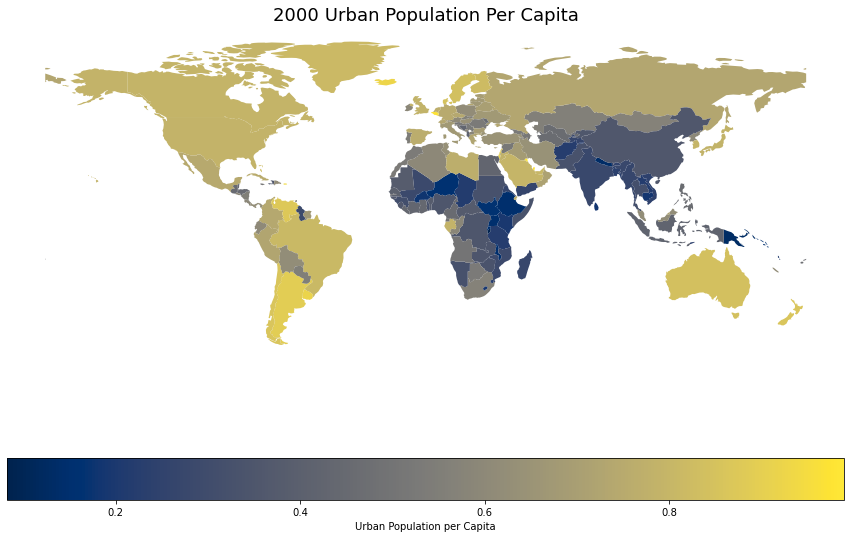

In [14]:
#Plotting the world population per capita for 2000
fig, ax = plt.subplots(figsize=(15,12))
ax.set_title('2000 Urban Population Per Capita', fontdict={'fontsize': 18})
ax.set_axis_off()
population_gdf.plot(column='2000_z',
           ax=ax,
           cmap = 'cividis',
           legend = True,
           legend_kwds={'label': "Urban Population per Capita", 'orientation': "horizontal"})

<AxesSubplot:title={'center':'2010 Urban Population Per Capita'}>

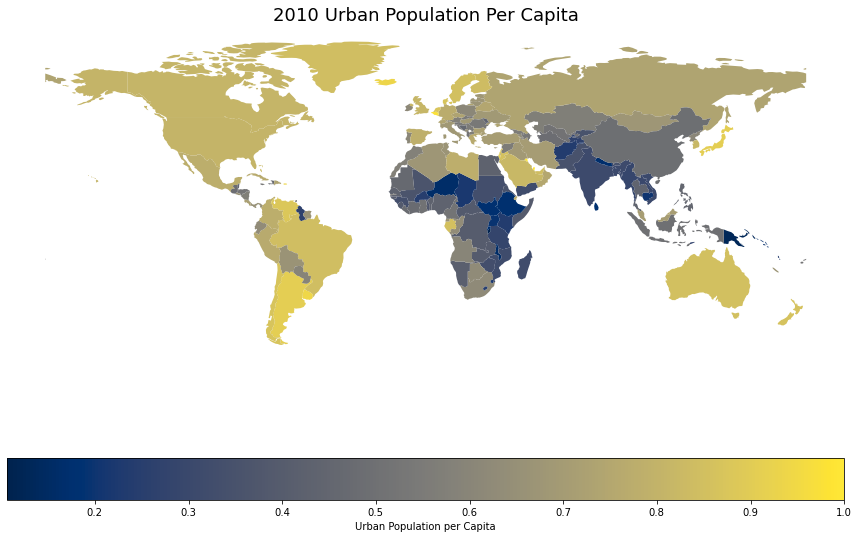

In [15]:
#Plotting the world population per capita for 2010
fig, ax = plt.subplots(figsize=(15,12))
ax.set_title('2010 Urban Population Per Capita', fontdict={'fontsize': 18})
ax.set_axis_off()
population_gdf.plot(column='2010_z',
           ax=ax,
           cmap = 'cividis',
           legend = True,
           legend_kwds={'label': "Urban Population per Capita", 'orientation': "horizontal"})

# Section 2.2

In [16]:
#Selecting urban population more than 290000000
pop_greaterthan_290m = population_gdf[population_gdf["2010_y"] > 290000000]
pop_greaterthan_290m.head()

,pop_est,continent,Country Name,Country Code,gdp_md_est,geometry,Country Name_x,1990_x,2000_x,2010_x,Country Name_y,1990_y,2000_y,2010_y,1990_z,2000_z,2010_z
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,187966119.0,223069137.0,249845296.0,United States,2.496230e+08,2.821624e+08,3.093217e+08,0.75300,0.79057,0.80772
93,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",India,223096279.0,292322757.0,381763166.0,India,8.732778e+08,1.056576e+09,1.234281e+09,0.25547,0.27667,0.30930
134,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",China,300165618.0,452999147.0,658498663.0,China,1.135185e+09,1.262645e+09,1.337705e+09,0.26442,0.35877,0.49226


<AxesSubplot:title={'center':'Urban Population Plot for Countries with more than 290000000'}>

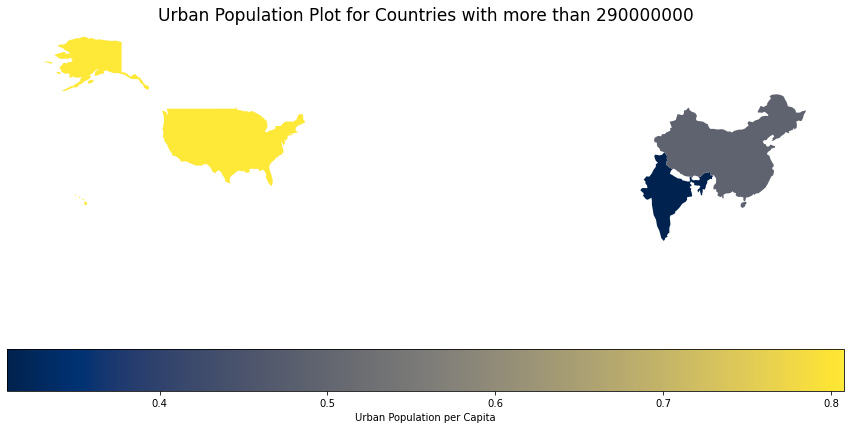

In [17]:
#Plotting urban population for countries that have a population of more than 290000000
fig, ax = plt.subplots(figsize=(15,12))
ax.set_title('Urban Population Plot for Countries with more than 290000000', fontdict={'fontsize': 17})
ax.set_axis_off()
pop_greaterthan_290m.plot(column='2010_z',
           ax=ax,
           cmap = 'cividis',
           legend = True,
           legend_kwds={'label': "Urban Population per Capita", 'orientation': "horizontal"})

The plot above shows the urban population per capita for countries with more than 290,000,000 people. From this plot it is evident that United states has the highest urban population per capita. On the other hand, China comes close with the second highest urban population per capita and India has the lowest of the three countries 


In [18]:
#Selecting Urban Population Per Capita for countries less than 69000000
pop_lesserthan_69m = population_gdf[population_gdf["2010_y"] < 69000000]
pop_lesserthan_69m.head()

,pop_est,continent,Country Name,Country Code,gdp_md_est,geometry,Country Name_x,1990_x,2000_x,2010_x,Country Name_y,1990_y,2000_y,2010_y,1990_z,2000_z,2010_z
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,303167.0,388537.0,448576.0,Fiji,728573.0,811006.0,859818.0,0.416111,0.47908,0.52171
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,4759494.0,7473332.0,12467582.0,Tanzania,25203845.0,33499180.0,44346525.0,0.188840,0.22309,0.28114
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,21206427.0,24388404.0,27522537.0,Canada,27691138.0,30685730.0,34004889.0,0.765820,0.79478,0.80937
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,9198366.0,8349417.0,9275230.0,Kazakhstan,16348000.0,14883626.0,16321872.0,0.562660,0.56098,0.56827
5,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,8483962.0,11370244.0,14554257.0,Uzbekistan,20510000.0,24650400.0,28562400.0,0.413650,0.46126,0.50956


<AxesSubplot:title={'center':'Urban Population Per Capita less than 69000000'}>

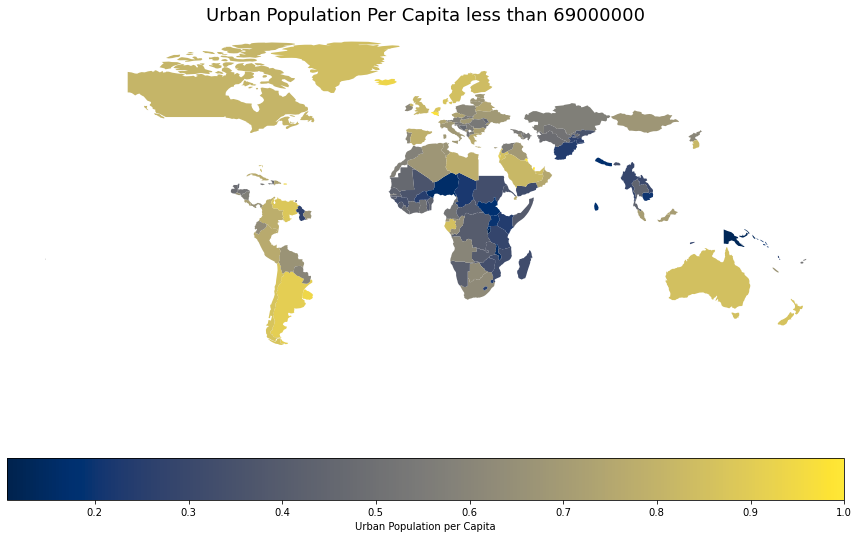

In [19]:
fig, ax = plt.subplots(figsize=(15,12))
ax.set_title('Urban Population Per Capita less than 69000000', fontdict={'fontsize': 18})
ax.set_axis_off()
pop_lesserthan_69m.plot(column='2010_z',
           ax=ax,
           cmap = 'cividis',
           legend = True,
           legend_kwds={'label': "Urban Population per Capita", 'orientation': "horizontal"})

From this plot, it is evident that the missing countries from the map have an urban population per capita above 69,000,000. Furthermore countries with really low urban population per capita are denoted with the dark blue colour 

In [20]:
#Selecting urban population per capita for countries having between 110146163 and 223096279
pop_between = population_gdf[(population_gdf["2010_x"] > 110146163) & (population_gdf["2010_x"] < 223096279)]
pop_between.head()


,pop_est,continent,Country Name,Country Code,gdp_md_est,geometry,Country Name_x,1990_x,2000_x,2010_x,Country Name_y,1990_y,2000_y,2010_y,1990_z,2000_z,2010_z
7,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,55483475.0,88840036.0,120709130.0,Indonesia,181413402.0,211513823.0,241834215.0,0.30584,0.42002,0.49914
25,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",Brazil,110146163.0,141915773.0,165055094.0,Brazil,149003223.0,174790340.0,195713635.0,0.73922,0.81192,0.84335
149,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",Japan,95542280.0,99760751.0,116302928.0,Japan,123537000.0,126843000.0,128070000.0,0.77339,0.78649,0.90812


<AxesSubplot:title={'center':'2010 Urban Population Per Capita for countries that have been 110146163 &223096279'}>

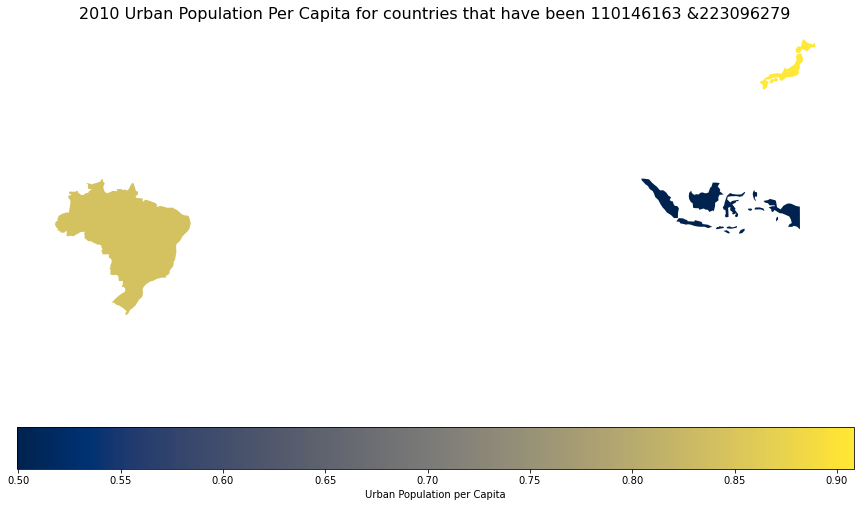

In [21]:
#Plotting urban population per capita for countries having between 110146163 and 223096279
fig, ax = plt.subplots(figsize=(15,12))
ax.set_title('2010 Urban Population Per Capita for countries that have been 110146163 &223096279', fontdict={'fontsize': 16})
ax.set_axis_off()
pop_between.plot(column='2010_z',
           ax=ax,
           cmap = 'cividis',
           legend = True,
           legend_kwds={'label': "Urban Population per Capita", 'orientation': "horizontal"})

From this plot, it is evident that Brazil, Japan and two countries in South-East Asia (Indonesia and Malaysia) have an urban population per capita between 110146163 and 223096279

In [22]:
#Finding the country with the highest population
population_gdf.iloc[population_gdf ["2010_y"].idxmax(), :]

pop_est                                                  1379302771
continent                                                      Asia
Country Name                                                  China
Country Code                                                    CHN
gdp_md_est                                                2.114e+07
geometry          (POLYGON ((109.4752095886636 18.19770091396857...
Country Name_x                                                China
1990_x                                                  3.00166e+08
2000_x                                                  4.52999e+08
2010_x                                                  6.58499e+08
Country Name_y                                                China
1990_y                                                  1.13518e+09
2000_y                                                  1.26264e+09
2010_y                                                  1.33770e+09
1990_z                                          

In [23]:
#Calculating the percentage change between 1990 and 2010
chn_1990 = population_gdf[population_gdf["Country Code"] == "CHN"]["1990_z"]
chn_2010 = population_gdf[population_gdf["Country Code"] == "CHN"]["2010_z"]

percentage_change = ((chn_2010-chn_1990)/chn_1990) * 100
percentage_change

134    86.165948
dtype: float64

In [24]:
#Creating a new dataframe to capture the urban and world population between 1990 and 2010
world_population_1990_2010 = world_population[["Country Name","Country Code", "1990","1991","1992","1993","1994","1995","1996",
                                           "1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007",
                                           "2008","2009","2010"]]

urban_population_1990_2010 = urban_population[["Country Name","Country Code", "1990","1991","1992","1993","1994","1995","1996",
                                           "1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007",
                                           "2008","2009","2010"]]

In [25]:
world_population_1990_2010.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,ABW,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,...,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0
1,Afghanistan,AFG,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,...,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0
2,Angola,AGO,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,...,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0
3,Albania,ALB,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,...,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0
4,Andorra,AND,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,...,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0


In [26]:
urban_population_1990_2010.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,ABW,31273.0,32507.0,34116.0,35953.0,37719.0,39172.0,40232.0,40970.0,...,43048.0,43670.0,44246.0,44669.0,44889.0,44882.0,44686.0,44378.0,44053.0,43778.0
1,Afghanistan,AFG,2628554.0,2828169.0,3093388.0,3391712.0,3677087.0,3916248.0,4093835.0,4220821.0,...,4790053.0,5031157.0,5293385.0,5563504.0,5824291.0,6055019.0,6263747.0,6464835.0,6680732.0,6927764.0
2,Angola,AGO,4400964.0,4725626.0,5067883.0,5427584.0,5806611.0,6159458.0,6530150.0,6918998.0,...,8688765.0,9190861.0,9721267.0,10284528.0,10882817.0,11437890.0,12025601.0,12644649.0,13291081.0,13963065.0
3,Albania,ALB,1197222.0,1198912.0,1209490.0,1219882.0,1230218.0,1240399.0,1250518.0,1260414.0,...,1298584.0,1327220.0,1354848.0,1381828.0,1407298.0,1430886.0,1452398.0,1473392.0,1495260.0,1519519.0
4,Andorra,AND,51627.0,53571.0,55546.0,57380.0,58847.0,59803.0,60128.0,59940.0,...,61991.0,64194.0,66747.0,69192.0,71205.0,72737.0,73843.0,74641.0,75098.0,75007.0


In [27]:
#Creating a join to calculate per capita for the 20 years
merged_1990_2010 = urban_population_1990_2010.merge(world_population_1990_2010, on="Country Code", how="inner")
merged_1990_2010.head()

,Country Name_x,Country Code,1990_x,1991_x,1992_x,1993_x,1994_x,1995_x,1996_x,1997_x,...,2001_y,2002_y,2003_y,2004_y,2005_y,2006_y,2007_y,2008_y,2009_y,2010_y
0,Aruba,ABW,31273.0,32507.0,34116.0,35953.0,37719.0,39172.0,40232.0,40970.0,...,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0
1,Afghanistan,AFG,2628554.0,2828169.0,3093388.0,3391712.0,3677087.0,3916248.0,4093835.0,4220821.0,...,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0
2,Angola,AGO,4400964.0,4725626.0,5067883.0,5427584.0,5806611.0,6159458.0,6530150.0,6918998.0,...,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0
3,Albania,ALB,1197222.0,1198912.0,1209490.0,1219882.0,1230218.0,1240399.0,1250518.0,1260414.0,...,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0
4,Andorra,AND,51627.0,53571.0,55546.0,57380.0,58847.0,59803.0,60128.0,59940.0,...,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0


In [28]:
#Calculating per capita for 1990 - 2010
merged_1990_2010['1990_z'] = merged_1990_2010['1990_x'] / merged_1990_2010['1990_y']
merged_1990_2010['1991_z'] = merged_1990_2010['1991_x'] / merged_1990_2010['1991_y']
merged_1990_2010['1992_z'] = merged_1990_2010['1992_x'] / merged_1990_2010['1992_y']
merged_1990_2010['1993_z'] = merged_1990_2010['1993_x'] / merged_1990_2010['1993_y']
merged_1990_2010['1994_z'] = merged_1990_2010['1994_x'] / merged_1990_2010['1994_y']
merged_1990_2010['1995_z'] = merged_1990_2010['1995_x'] / merged_1990_2010['1995_y']
merged_1990_2010['1996_z'] = merged_1990_2010['1996_x'] / merged_1990_2010['1996_y']
merged_1990_2010['1997_z'] = merged_1990_2010['1997_x'] / merged_1990_2010['1997_y']
merged_1990_2010['1998_z'] = merged_1990_2010['1998_x'] / merged_1990_2010['1998_y']
merged_1990_2010['1999_z'] = merged_1990_2010['1999_x'] / merged_1990_2010['1999_y']
merged_1990_2010['2000_z'] = merged_1990_2010['2000_x'] / merged_1990_2010['2000_y']
merged_1990_2010['2001_z'] = merged_1990_2010['2001_x'] / merged_1990_2010['2001_y']
merged_1990_2010['2002_z'] = merged_1990_2010['2002_x'] / merged_1990_2010['2002_y']
merged_1990_2010['2003_z'] = merged_1990_2010['2003_x'] / merged_1990_2010['2003_y']
merged_1990_2010['2004_z'] = merged_1990_2010['2004_x'] / merged_1990_2010['2004_y']
merged_1990_2010['2005_z'] = merged_1990_2010['2005_x'] / merged_1990_2010['2005_y']
merged_1990_2010['2006_z'] = merged_1990_2010['2006_x'] / merged_1990_2010['2006_y']
merged_1990_2010['2007_z'] = merged_1990_2010['2007_x'] / merged_1990_2010['2007_y']
merged_1990_2010['2008_z'] = merged_1990_2010['2008_x'] / merged_1990_2010['2008_y']
merged_1990_2010['2009_z'] = merged_1990_2010['2009_x'] / merged_1990_2010['2009_y']
merged_1990_2010['2010_z'] = merged_1990_2010['2010_x'] / merged_1990_2010['2010_y']

merged_1990_2010.head()

,Country Name_x,Country Code,1990_x,1991_x,1992_x,1993_x,1994_x,1995_x,1996_x,1997_x,...,2001_z,2002_z,2003_z,2004_z,2005_z,2006_z,2007_z,2008_z,2009_z,2010_z
0,Aruba,ABW,31273.0,32507.0,34116.0,35953.0,37719.0,39172.0,40232.0,40970.0,...,0.463390,0.459723,0.456064,0.452404,0.448751,0.445108,0.441465,0.437834,0.434212,0.430593
1,Afghanistan,AFG,2628554.0,2828169.0,3093388.0,3391712.0,3677087.0,3916248.0,4093835.0,4220821.0,...,0.221690,0.222610,0.223530,0.225000,0.227030,0.229070,0.231130,0.233200,0.235280,0.237370
2,Angola,AGO,4400964.0,4725626.0,5067883.0,5427584.0,5806611.0,6159458.0,6530150.0,6918998.0,...,0.512740,0.524610,0.536450,0.548270,0.560000,0.567640,0.575240,0.582820,0.590340,0.597830
3,Albania,ALB,1197222.0,1198912.0,1209490.0,1219882.0,1230218.0,1240399.0,1250518.0,1260414.0,...,0.424350,0.435010,0.445730,0.456510,0.467310,0.478150,0.489020,0.499910,0.510760,0.521630
4,Andorra,AND,51627.0,53571.0,55546.0,57380.0,58847.0,59803.0,60128.0,59940.0,...,0.920554,0.916416,0.912069,0.907507,0.902849,0.898065,0.893075,0.890046,0.889123,0.888193


In [29]:
#Calculating the mean for per capita

merged_1990_2010['mean_z'] = (merged_1990_2010['1990_z'] + merged_1990_2010['1991_z'] + merged_1990_2010['1992_z'] + merged_1990_2010['1993_z'] +
merged_1990_2010['1994_z'] + merged_1990_2010['1995_z'] + merged_1990_2010['1996_z'] + merged_1990_2010['1997_z'] + merged_1990_2010['1998_z'] +
merged_1990_2010['1999_z'] + merged_1990_2010['2000_z'] + merged_1990_2010['2001_z'] + merged_1990_2010['2002_z'] +
merged_1990_2010['2003_z'] + merged_1990_2010['2004_z'] + merged_1990_2010['2005_z'] + merged_1990_2010['2006_z'] + merged_1990_2010['2007_z'] +
+ merged_1990_2010['2008_z'] + merged_1990_2010['2009_z'] +  merged_1990_2010['2010_z']) / 21

print(merged_1990_2010['mean_z'])

0      0.467995
1      0.222128
2      0.496477
3      0.429190
4      0.919814
         ...   
259         NaN
260    0.263220
261    0.570134
262    0.371357
263    0.327325
Name: mean_z, Length: 264, dtype: float64


In [30]:
#Calculating the mean of the world population
merged_1990_2010['mean_y'] = (merged_1990_2010['1990_y'] + merged_1990_2010['1991_y'] + merged_1990_2010['1992_y'] + merged_1990_2010['1993_y'] +
merged_1990_2010['1994_y'] + merged_1990_2010['1995_y'] + merged_1990_2010['1996_y'] + merged_1990_2010['1997_y'] + merged_1990_2010['1998_y'] +
merged_1990_2010['1999_y'] + merged_1990_2010['2000_y'] + merged_1990_2010['2001_y'] + merged_1990_2010['2002_y'] +
merged_1990_2010['2003_y'] + merged_1990_2010['2004_y'] + merged_1990_2010['2005_y'] + merged_1990_2010['2006_y'] + merged_1990_2010['2007_y'] +
+ merged_1990_2010['2008_y'] + merged_1990_2010['2009_y'] +  merged_1990_2010['2010_y']) / 21

print(merged_1990_2010['mean_y'])

0      8.812062e+04
1      2.129546e+07
2      1.683680e+07
3      3.095489e+06
4      6.963281e+04
           ...     
259    1.833848e+06
260    1.745547e+07
261    4.455899e+07
262    1.054246e+07
263    1.173322e+07
Name: mean_y, Length: 264, dtype: float64


In [31]:
#Adding Geometry to the Dataframe
merged_1990_2010_gdf = world.merge(merged_1990_2010, on="Country Code", how="inner")
merged_1990_2010_gdf.head()

,pop_est,continent,Country Name,Country Code,gdp_md_est,geometry,Country Name_x,1990_x,1991_x,1992_x,...,2003_z,2004_z,2005_z,2006_z,2007_z,2008_z,2009_z,2010_z,mean_z,mean_y
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,303167.0,311670.0,321283.0,...,0.49085,0.49479,0.49871,0.502641,0.50657,0.51146,0.51658,0.52171,0.475321,8.003155e+05
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,4759494.0,5004951.0,5267139.0,...,0.23611,0.24223,0.24845,0.254780,0.26121,0.26776,0.27439,0.28114,0.227875,3.408031e+07
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,21206427.0,21482271.0,21813814.0,...,0.79967,0.80045,0.80122,0.802130,0.80396,0.80578,0.80758,0.80937,0.789829,3.078078e+07
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,187966119.0,191509147.0,195199459.0,...,0.79583,0.79757,0.79928,0.800990,0.80269,0.80438,0.80606,0.80772,0.785540,2.808748e+08
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,9198366.0,9241068.0,9219538.0,...,0.56317,0.56390,0.56463,0.565360,0.56609,0.56682,0.56755,0.56827,0.562546,1.556862e+07


<AxesSubplot:title={'center':'Mean per capita urban world population'}>

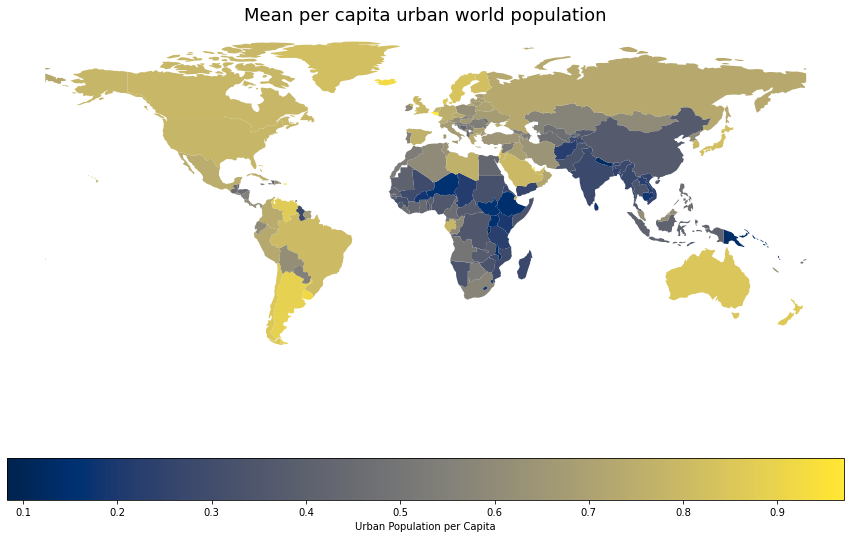

In [32]:
fig, ax = plt.subplots(figsize=(15,12))
ax.set_title('Mean per capita urban world population', fontdict={'fontsize': 18})
ax.set_axis_off()
merged_1990_2010_gdf.plot(column='mean_z',
           ax=ax,
           cmap = 'cividis',
           legend = True,
           legend_kwds={'label': "Urban Population per Capita", 'orientation': "horizontal"})

From this plot, it can be deduced that Gabon, Uruguay, Argentina, Paraguay, Belgium and Iceland have higher mean per capita urban world population

Text(0, 0.5, 'Mean Per Capita Urban Population')

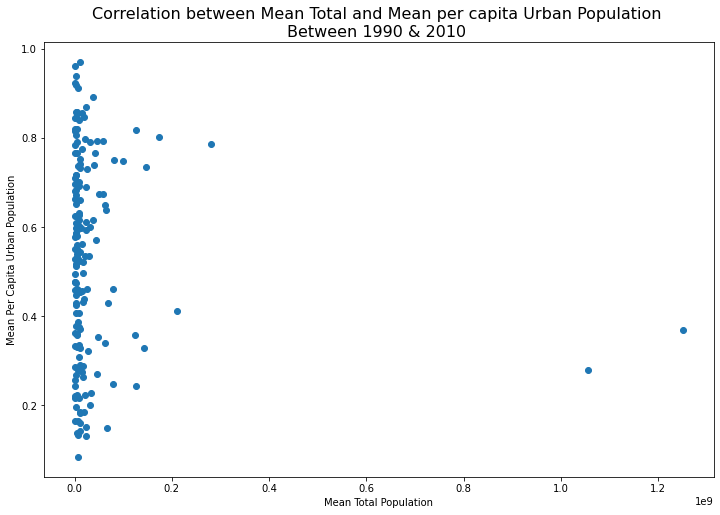

In [33]:
#correlation plot
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Correlation between Mean Total and Mean per capita Urban Population \nBetween 1990 & 2010 ', fontdict={'fontsize': 16})
plt.scatter(merged_1990_2010_gdf["mean_y"],merged_1990_2010_gdf["mean_z"])
plt.xlabel("Mean Total Population")
plt.ylabel("Mean Per Capita Urban Population")

# References

https://data36.com/scatter-plot-pandas-matplotlib/
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
https://www.w3schools.com/python/matplotlib_scatter.asp
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
https://www.geeksforgeeks.org/python-pandas-dataframe-idxmax/#:~:text=idxmax()%20function%20returns%20index,NA%2Fnull%20values%20are%20excluded.&text=Example%20%231%3A%20Use%20idxmax(),value%20along%20the%20index%20axis.
https://matplotlib.org/stable/tutorials/colors/colormaps.html
